<div class="alert alert-block alert-success">
    <b>ARTIFICIAL INTELLIGENCE (E016350A)</b> <br>
ALEKSANDRA PIZURICA <br>
GHENT UNIVERSITY <br>
AY 2024/2025 <br>
Assistant: Nicolas Vercheval
</div>

# Regularization - part I

In the theory class, you have seen the role of regularization in regression and classification problems and some common types of regularisation techniques, like $\ell_1$ and $\ell_2$ regularisation. We explained the linear least squares regression with $\ell_2$ regularization (Ridge regression or Tikhonov regularization) and the linear least squares regression with $\ell_1$ regularization (LASSO regression). Now, you experiment with these regularisation approaches and with a combined $\ell_1-\ell_2$ regularization (Elasticnet regression).

The following examples illustrate the standard regularizations that accompany regression models. Other libraries refer to a `penalty` parameter, which enables the setting of some regularization technique.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn import linear_model, model_selection, metrics, datasets, preprocessing

In [3]:
np.random.seed(7)

We use a set of data to predict real estate prices.

In [4]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


This set has 8 attributes.

#### Exercise: Split the dataset and perform feature normalization

Split the dataset using a train-test split of 2 : 1. Set the random state to 42.

Perform feature normalization.

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.data, data.target, test_size=0.33, random_state = 42)

In [8]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1. Linear regression

We use the simple linear regression model as the base model.

#### Exercise: Train a linear regression model on the data

In [6]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Model coefficients can be obtained via the `coef_` property.

In [7]:
linear.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

We will monitor the performance of the model at the training set and the test set. We will use the coefficient of determination as a metric.

In [8]:
linear_train_score = linear.score(X_train, y_train) 

In [9]:
linear_test_score = linear.score(X_test, y_test) 

In [10]:
print('Training: ', linear_train_score, '\nTesting: ', linear_test_score)

Training:  0.609370412027382 
Testing:  0.5970494128783952


### 2. Ridge regression (Tikhonov regularization)

Recall from the theory class that  linear regression with the square loss function and $\ell_2$ regularisation is called Ridge regression or Tikhonov regularisation. We explained that in this case, the weights $w_i$ are determined by minimising the following cost function: $$\|\textbf{y}-\textbf{Xw}\|^2_2+\lambda\|\textbf{w}\|^2_2.$$ The $\lambda$ parameter is a meta parameter that affects the strength of regularization. For large values of the $\lambda$ parameter, the model is encouraged to have small coefficients. The coefficients obtained in this way can be close to zero, but they are rarely exactly zero because their squared value becomes so small that has little to no impact before that happens.

Working with linear regression models with $\ell_2$ regularization is supported by the `scikit-learn` library via the `Ridge` class. The `alpha` parameter plays the role of the regularization hyperparameter $\lambda $. Its values must be positive numbers.

#### Exercise: Train the `Ridge` regression model on the training data

Use `lambda_ridge` as the $\lambda$ parameter.

In [11]:
# alpha is a different notation for the \lambda parameter (lambda is already a keyword!)
lambda_ridge = 100
ridge = linear_model.Ridge(alpha = lambda_ridge)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [12]:
ridge.coef_

array([ 0.83886389,  0.12859508, -0.27369637,  0.3167865 ,  0.00267481,
       -0.04208248, -0.81376631, -0.78849358])

In [13]:
print('Squared sum of the coefficients without regularization:', (linear.coef_ ** 2).sum())
print('Squared sum of the coefficients with Ridge regularization:', (ridge.coef_ ** 2).sum())

Squared sum of the coefficients without regularization: 2.5004045011496596
Squared sum of the coefficients with Ridge regularization: 2.1812085194596063


In [14]:
ridge_train_score = ridge.score(X_train, y_train) 

In [15]:
ridge_test_score = ridge.score(X_test, y_test) 

In [16]:
print('Training: ', ridge_train_score, '\nTesting: ', ridge_test_score)

Training:  0.6085437855850729 
Testing:  0.5978017114308234


### 3. Lasso regression (linear regression with $\ell_1$ regularization)

In contrast to the Tikhonov regularisation, LASSO (Least Absolute Shrinkage and Selection Operator) regularization adds the term $\|w\|_1= \lambda\sum\limits_{i = 1}^{N}{|w_{i}|}$ to the squared error term of the regression model. The $\lambda$ parameter is a meta parameter that affects the strength of regularization. Unlike ridge regression, such models can result in coefficients equal to zero.

Working with linear regression models with lasso regularization is supported by the `scikit-learn` library via the `Lasso` class. The `alpha` parameter plays the role of the regularization hyperparameter $\lambda $. Its value must be a positive number.

#### Exercise: Train the `Lasso` regression model on the training data

Use `lambda_lasso` as the $\lambda$ parameter.

In [17]:
lambda_lasso = 0.01
lasso = linear_model.Lasso(alpha=lambda_lasso)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [18]:
lasso.coef_

array([ 0.79296204,  0.12425208, -0.16249723,  0.20902305,  0.        ,
       -0.03116597, -0.78933429, -0.75764998])

In [19]:
print('Absolute sum of the coefficients without regularization:', abs(linear.coef_).sum())
print('Absolute sum of the coefficients with Lasso regularization:', abs(lasso.coef_).sum())

Absolute sum of the coefficients without regularization: 3.4196150138694152
Absolute sum of the coefficients with Lasso regularization: 2.8668846462201527


In [20]:
lasso_train_score = lasso.score(X_train, y_train) 

In [21]:
lasso_test_score = lasso.score(X_test, y_test) 

In [22]:
print('Training: ', lasso_train_score, '\nTesting: ', lasso_test_score)

Training:  0.60521849751365 
Testing:  0.5983464035389281


### 4. ElasticNet regression (linear regression with $\ell_1$ and $\ell_2$ regularization)

`ElasticNet` is a type of regularization that combines $\ell_1$ and $\ell_2$ regularization. The regularization expression added to the model is $a\cdot \ell_1 + 0.5\cdot b \cdot \ell_2$. For $a=0$, the expression corresponds to ridge regularization, while for $b=0$, the expression corresponds to lasso regularization. This type of regularization is supported by the `ElasticNet` function at the `scikit-learn` library level. The parameters `alpha` and `l1_ratio` are so that $\alpha=a+b $ and $\ell_1\_ratio = \frac{a}{a+b}$.

#### Exercise: Train the `ElasticNet` regression model on the training data

Use `lambda_elastic` as the $\lambda$ parameter, and `l1_ratio` as $\ell_1\_ratio$.

In [23]:
lambda_elastic = 0.005
l1_ratio = 0.5
elastic = linear_model.ElasticNet(alpha = lambda_elastic , l1_ratio = l1_ratio)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.005)

In [24]:
elastic.coef_

array([ 0.83108584,  0.12400119, -0.25721464,  0.30302788,  0.        ,
       -0.03916718, -0.83901651, -0.81265654])

In [25]:
elastic_train_score = elastic.score(X_train, y_train) 

In [26]:
elastic_test_score = elastic.score(X_test, y_test) 

In [27]:
print('Squared sum of the coefficients without regularization:', (linear.coef_ ** 2).sum())
print('Squared sum of the coefficients with Elasticnet regularization:', (elastic.coef_ ** 2).sum())
print('Absolute sum of the coefficients without regularization:', abs(linear.coef_).sum())
print('Absolute sum of the coefficients with Elasticnet regularization:', abs(elastic.coef_).sum())

Squared sum of the coefficients without regularization: 2.5004045011496596
Squared sum of the coefficients with Elasticnet regularization: 2.2299586615797224
Absolute sum of the coefficients without regularization: 3.4196150138694152
Absolute sum of the coefficients with Elasticnet regularization: 3.2061697804357667


In [28]:
print('Training: ', elastic_train_score, '\nTesting: ', elastic_test_score)

Training:  0.6087249069341585 
Testing:  0.5984149853541165


### Visualization of the model coefficients

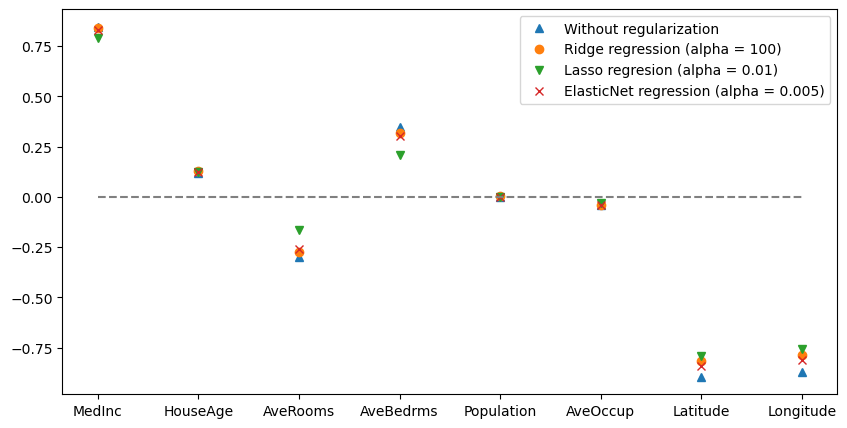

In [29]:
number_of_features = len(data.feature_names)
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, number_of_features), data.feature_names, rotation='horizontal')
plt.plot(linear.coef_, '^', label='Without regularization' )
plt.plot(ridge.coef_, 'o', label=f'Ridge regression (alpha = {lambda_ridge})')
plt.plot(lasso.coef_, 'v', label=f'Lasso regresion (alpha = {lambda_lasso})')
plt.plot(elastic.coef_, 'x', label=f'ElasticNet regression (alpha = {lambda_elastic})')
plt.plot(np.arange(0, number_of_features), np.zeros(number_of_features), color='gray', linestyle='--')
plt.legend(loc='best')
plt.show()

The values of hyperparameters that occur in regularized models are determined in the same way as the hyperparameters of the models observed so far.